<a href="https://colab.research.google.com/github/jamessj0412/Smart-Sorting-Transfer-Learning-for-Identifying-Rotten-Fruits-and-Vegetables/blob/main/Smartinternz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Smart Sorting: Transfer Learning for Identifying Rotten Fruits and Vegetables

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
def filter_classes(x, y, class_list):
    idx = np.isin(y, class_list).flatten()
    x_filtered = x[idx]
    y_filtered = y[idx]
    return x_filtered, y_filtered

In [ ]:
class_map = {0: 'fresh', 1: 'rotten'}
x_train, y_train = filter_classes(x_train, y_train, [0, 1])
x_test, y_test = filter_classes(x_test, y_test, [0, 1])

In [ ]:
x_train = tf.image.resize(x_train, [96, 96]) / 255.0
x_test = tf.image.resize(x_test, [96, 96]) / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    preprocessing_function=preprocess_input
)

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow(x_train, y_train, batch_size=32)
test_gen = test_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(train_gen, validation_data=test_gen, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.4917 - loss: 0.7399

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 103s 304ms/step - accuracy: 0.4917 - loss: 0.7398 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 294ms/step - accuracy: 0.4821 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 300ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 289ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 290ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
loss, acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {acc:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.5085 - loss: 0.6930

Test Accuracy: 0.50


In [ ]:
class_names = ['fresh', 'rotten']
x_sample, y_sample = next(test_gen)
preds = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


In [ ]:
x_sample, y_sample = next(test_gen)
preds = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


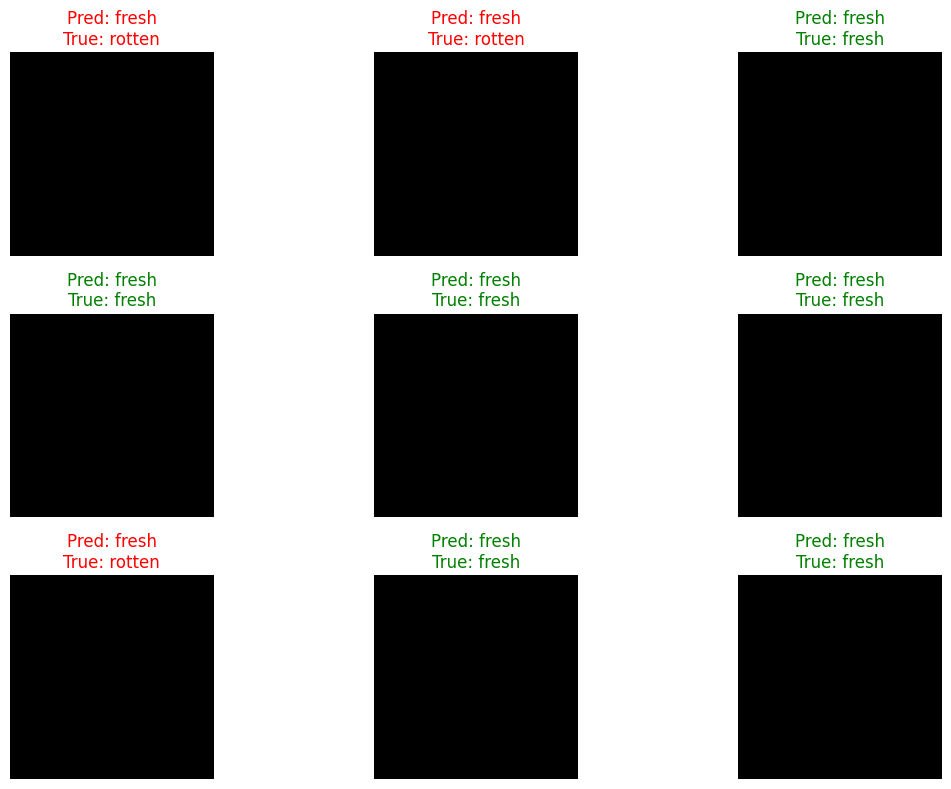

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow((x_sample[i] * 0.5 + 0.5))  # Undo preprocessing a bit for visibility
    pred_label = class_names[np.argmax(preds[i])]
    true_label = class_names[np.argmax(y_sample[i])]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()